In [35]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

In [36]:

weight = 0.7
bias = 0.3

In [37]:
start, end, step = 0, 1, 0.01

In [38]:
X = torch.arange(start, end, step)

In [39]:
y = weight * X + bias

In [40]:
# Split the data as training (80%) and test (20%)

training_split = int(0.8 * len(y))
training_split

80

In [41]:
X_train = X[:training_split]
y_train = y[:training_split]

X_test = X[training_split:]
y_test = y[training_split:]

In [42]:
X_train.shape, X_test.shape

(torch.Size([80]), torch.Size([20]))

# The architecture

In [43]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1), requires_grad=True)
    self.bias    = nn.Parameter(torch.randn(1), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.bias + x * self.weights

# For convinience, we write a plotting function

In [44]:
def plot_prediction (x, pred_y_for_x):

  plt.plot(X_train, y_train, 'b.', label = "train data")
  plt.plot(X_test, y_test, 'g.', label = "test data")
  plt.plot(x, pred_y_for_x, 'r.', label = "prediction")
  plt.legend()
  plt.xlabel("X")
  plt.ylabel("y")


## Some tools that are useful from here on:

1. `torch.nn` (has all the builing blocks for a NN)
2. `torch.nn.Module` (Any NN we design should inherit from this  - i.e., should be subclasses of this base class)
3. `torch.optim` (optimization techniques - used to optimze the values of Parameters to reduce the loss)
4. `torch.utils.data.Dataset`
5. `torch.utils.data.Dataloader` (used to split and iterate over the Dataset)



# create an instance of the architecture we created:


In [45]:
model_0 = LinearRegressionModel()

In [46]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.0020], requires_grad=True),
 Parameter containing:
 tensor([0.9088], requires_grad=True)]

In [47]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.0020])), ('bias', tensor([0.9088]))])

# See what prediction is made with the initial weights


In [48]:
pred_test = model_0(X_test)
pred_test

tensor([0.9103, 0.9104, 0.9104, 0.9104, 0.9104, 0.9104, 0.9105, 0.9105, 0.9105,
        0.9105, 0.9105, 0.9106, 0.9106, 0.9106, 0.9106, 0.9106, 0.9107, 0.9107,
        0.9107, 0.9107], grad_fn=<AddBackward0>)

In [49]:
# gradient etc are not needed while in inference 
# mode (no need to keep track of the gradient)
with torch.inference_mode(): 
  pred_test = model_0(X_test)

pred_test

tensor([0.9103, 0.9104, 0.9104, 0.9104, 0.9104, 0.9104, 0.9105, 0.9105, 0.9105,
        0.9105, 0.9105, 0.9106, 0.9106, 0.9106, 0.9106, 0.9106, 0.9107, 0.9107,
        0.9107, 0.9107])

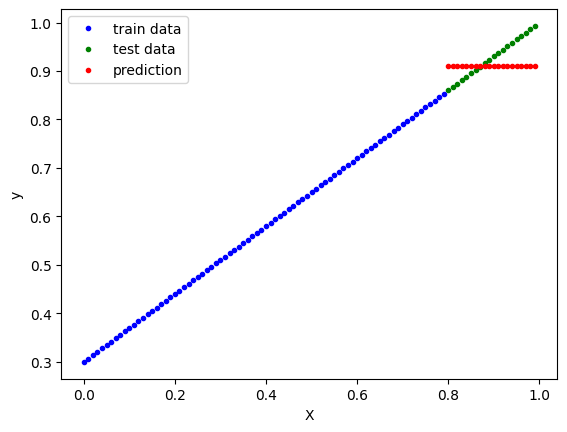

In [50]:
plot_prediction (X_test, pred_test)


# Set up the loss function

In [51]:
# this is mean abs error (L2Loss is MSE)
loss_fn = nn.L1Loss() 


# Set up optimizer (stochastic algorithm to minimize the loss function as guided by the gradient)

In [52]:
optimizer = torch.optim.SGD (params = model_0.parameters(), lr = 0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

# Start training

What is an epoch? 
An epoch refers to passing the entire input data once through the network and get the output as well as the loss function and gradient. 

In the next epoch, the same input data will be passed through the network and compute the output, however the weights will be different this time due to the gradient optimization from the previous epoch. 



In [53]:
epochs = 1000

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  
  # gradient will be tracked while making a prediction
  model_0.train()   
  # predict y for the entire training data
  y_pred = model_0 (X_train) 
  # compute loss function
  loss = loss_fn(y_pred, y_train) 
  # reset grads to zero to avoid accumulating the gradients from each step
  optimizer.zero_grad() 
  # compute gradient w.r.t each parameters i.e, which direction the 
  # parameters are to be changed to minimize the loss
  loss.backward() 
  # make a step along the direction identified in the previos line
  optimizer.step() 

  
  # turn off the settings that are not needed for just evaluation
  model_0.eval() 
  # gradient need not be tracked
  with torch.inference_mode():
    y_pred_test = model_0(X_test)

    test_loss = loss_fn(y_pred_test, y_test)

    if epoch % 25 == 0:
      print (f"\n Epoch: {epoch} | Loss: {loss} | test loss: {test_loss}")
      print(model_0.state_dict())

      epoch_count.append(epoch)
      loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())




 Epoch: 0 | Loss: 0.3330514430999756 | test loss: 0.04128593951463699
OrderedDict([('weights', tensor([-0.0020])), ('bias', tensor([0.8988]))])

 Epoch: 25 | Loss: 0.17817389965057373 | test loss: 0.24802520871162415
OrderedDict([('weights', tensor([-0.0487])), ('bias', tensor([0.7220]))])

 Epoch: 50 | Loss: 0.15290430188179016 | test loss: 0.30754634737968445
OrderedDict([('weights', tensor([-0.0325])), ('bias', tensor([0.6480]))])

 Epoch: 75 | Loss: 0.1421542465686798 | test loss: 0.315996915102005
OrderedDict([('weights', tensor([0.0011])), ('bias', tensor([0.6095]))])

 Epoch: 100 | Loss: 0.13327065110206604 | test loss: 0.3069261908531189
OrderedDict([('weights', tensor([0.0403])), ('bias', tensor([0.5835]))])

 Epoch: 125 | Loss: 0.12469830363988876 | test loss: 0.28780657052993774
OrderedDict([('weights', tensor([0.0826])), ('bias', tensor([0.5648]))])

 Epoch: 150 | Loss: 0.11613066494464874 | test loss: 0.2686869502067566
OrderedDict([('weights', tensor([0.1249])), ('bias',

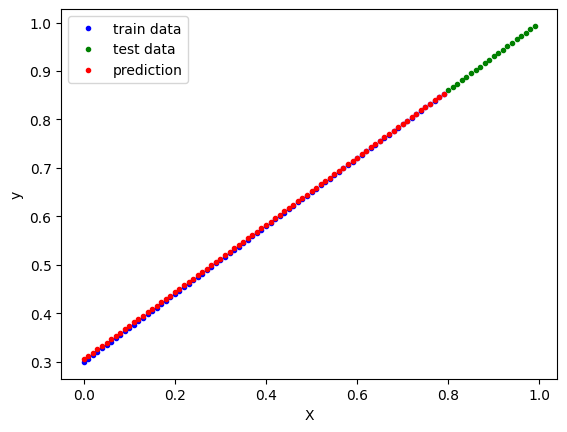

In [54]:
plot_prediction (X_train, y_pred.detach().numpy())

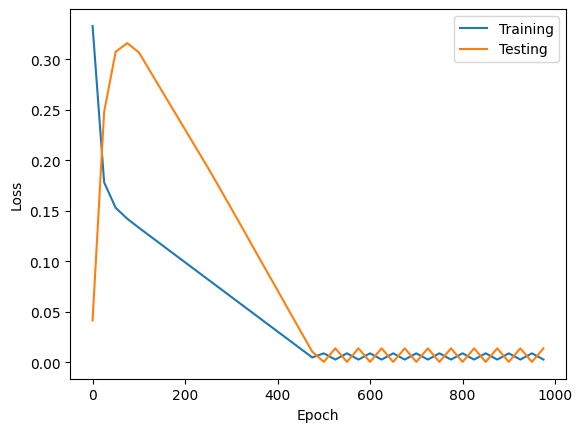

In [55]:
plt.plot(epoch_count, loss_values, label="Training")
plt.plot(epoch_count, test_loss_values, label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

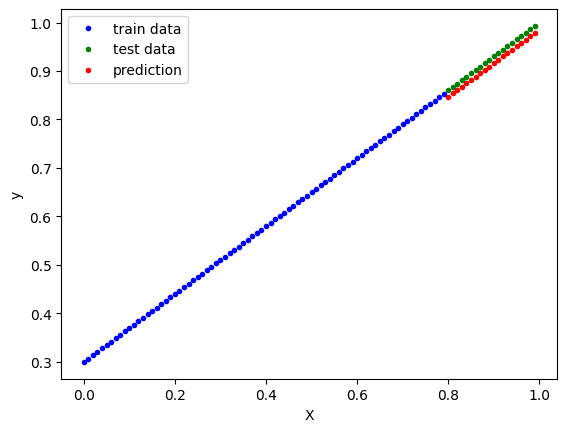

In [56]:
plot_prediction (X_test, y_pred_test.detach().numpy())


# Saving the model

In [57]:
mkdir -p models/01_pytorch_workflow/

In [58]:
ls

models/  sample_data/


In [59]:
ls models

01_pytorch_workflow/


In [60]:
save_path = "models/01_pytorch_workflow/model.pth"
torch.save(obj = model_0.state_dict(), f = save_path)

In [61]:
ls models/01_pytorch_workflow/

model.pth


# Loading a saved model

In [62]:
loaded_state_dict = torch.load("models/01_pytorch_workflow/model.pth")

In [63]:
# what we load is a state dict, not the entire model object. 
# so we create an empty model and feed in the state dict
Loaded_model_0 = LinearRegressionModel()

In [64]:
# the model has some random weights - far from the optimized ones
Loaded_model_0.state_dict()

OrderedDict([('weights', tensor([1.0872])), ('bias', tensor([-1.5106]))])

In [65]:
Loaded_model_0.load_state_dict(loaded_state_dict)

<All keys matched successfully>

In [66]:
Loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6901])), ('bias', tensor([0.2950]))])